# Mobile App for Lottery Addiction

Many people start playing the lottery for fun, but for some this activity turns into a habit which eventually escalates into addiction. Like other compulsive gamblers, lottery addicts soon begin spending from their savings and loans, they start to accumulate debts, and eventually engage in desperate behaviors like theft.

In this project we will estimate the chances of winning. We expect the chances are very low and hopefully this data can help gambling addicts with their addiction.

We will focus on the [6/49](https://en.wikipedia.org/wiki/Lotto_6/49) lottery and show statics for:

* The probability of winning the big prize with a single ticket?
* The probability of winning the big prize if we play 40 different tickets (or any other number)?
* The probability of having at least five (or four, or three, or two) winning numbers on a single ticket?

We will consider historical data coming from the national 6/49 lottery game in Canada. [The data set](https://www.kaggle.com/datascienceai/lottery-dataset) has data for 3,665 drawings, dating from 1982 to 2018.

## Defining formulas used in this project

In [18]:
# Calculates the factorial for n
# n!
def factorial(n):
    x = 1
    for i in range(n, 0, -1):
        x *= i

    return x

In [20]:
# Calculated the combinations (not permutations) for k objects from a group of n objects
# n choose k = n! / k!(n-k)!
def combinations(n, k):
    numerator = factorial(n)
    demoninator = factorial(k) * factorial(n - k)
    return numerator / demoninator

## The Big Prize

In the 6/49 lottery, six numbers are drawn from a set of 49 numbers that range from 1 to 49. A player wins the big prize if the six numbers on their tickets match all the six numbers drawn. If a player has a ticket with the numbers {13, 22, 24, 27, 42, 44}, he only wins the big prize if the numbers drawn are {13, 22, 24, 27, 42, 44}. If only one number differs, he doesn't win.

It's important to mention that the numbers drawn are sampled without replacement.

In [24]:
# We will use the numbers {13, 22, 24, 27, 42, 44} in our examples
# Imagine these are the numbers printed on a ticket
ticket_number = [13, 22, 24, 27, 42, 44]

def big_prize_probability(numbers):
    total_outcomes = combinations(49, 6)

    # P(a) = successful outcomes (1) / possible outcomes (total_outcomes)
    p_big_prize = 1 / total_outcomes # 1 because there's only 1 successful outcome: 13, 22, 24, 27, 42 and 44.
    return p_big_prize

print("The chances of winning the big prize is {}%".format(format(big_prize_probability(ticket_number)*100, '.8f')))

The chances of winning the big prize is 0.00000715%


A 0.00000715% probability can be rephrased as a very small chance of something happening. It means that out of 1 million attempts, this event is expected to happen only about 0.07 times. So, the likelihood of the event occurring is extremely low.

* odds against = (1 - probability) / probability
* odds against = (1 - 0.00000715) / 0.00000715
* odds against = 139.859,139

In other words. The player has a chance of 1 in 139.859,139 to win

## Historical Data Check for Canada Lottery

Let's clarify the small chance of winning with a real world example by using our ticket numbers (13, 22, 24, 27, 42, 44) and check if we would've ever won the big prize since the beginning of the lottery. The 6/49 lottery was created in 1982.

In [25]:
import pandas as pd

dataset = pd.read_csv("data/649.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCT          3665 non-null   int64 
 1   DRAW NUMBER      3665 non-null   int64 
 2   SEQUENCE NUMBER  3665 non-null   int64 
 3   DRAW DATE        3665 non-null   object
 4   NUMBER DRAWN 1   3665 non-null   int64 
 5   NUMBER DRAWN 2   3665 non-null   int64 
 6   NUMBER DRAWN 3   3665 non-null   int64 
 7   NUMBER DRAWN 4   3665 non-null   int64 
 8   NUMBER DRAWN 5   3665 non-null   int64 
 9   NUMBER DRAWN 6   3665 non-null   int64 
 10  BONUS NUMBER     3665 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 315.1+ KB


In [26]:
dataset.head()

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
0,649,1,0,6/12/1982,3,11,12,14,41,43,13
1,649,2,0,6/19/1982,8,33,36,37,39,41,9
2,649,3,0,6/26/1982,1,6,23,24,27,39,34
3,649,4,0,7/3/1982,3,9,10,13,20,43,34
4,649,5,0,7/10/1982,5,14,21,31,34,47,45


In [28]:
# Making sure we only work with data from the 649 lottery
dataset['PRODUCT'].value_counts()

649    3665
Name: PRODUCT, dtype: int64

In [42]:
# helper method to extract all winning numbers into a set
def extract_numbers(row):
    winning_numbers = {row['NUMBER DRAWN 1'], 
                       row['NUMBER DRAWN 2'], 
                       row['NUMBER DRAWN 3'], 
                       row['NUMBER DRAWN 4'], 
                       row['NUMBER DRAWN 5'], 
                       row['NUMBER DRAWN 6']}
    return winning_numbers

In [45]:
# Extracted all winning numbers since 1982 into a Series
winning_numbers = pd.Series(dataset.apply(extract_numbers, axis=1))
winning_numbers.head()

0    {3, 41, 11, 12, 43, 14}
1    {33, 36, 37, 39, 8, 41}
2     {1, 6, 39, 23, 24, 27}
3     {3, 9, 10, 43, 13, 20}
4    {34, 5, 14, 47, 21, 31}
dtype: object

In [59]:
def check_historical_occurence(ticket_numbers, winning_numbers):
    mask = winning_numbers == ticket_numbers
    return mask

historical_matches = check_historical_occurence(set(ticket_number), winning_numbers).sum()
print("Using the ticket numbers in our example. We found that the combination of 13, 22, 24, 27, 42, 44 matched {} times to the winning numbers drawn since 1982.".format(historical_matches))


Using the ticket numbers in our example. We found that the combination of 13, 22, 24, 27, 42, 44 matches 0 times to the winning numbers drawn since 1982.


## Multi-ticket Probability

It's possible to play with more than one ticket on a single drawing. This might give the player the idea that it increases their chances of winning significantly.

Let's calculate the probability and hope this better estimates their chances of winning after reading this research.

In [64]:
def multi_ticket_probability(ticket_amount):
    total_outcomes = combinations(49, 6)

     # P(a) = successful outcomes (ticket_amount) / possible outcomes (total_outcomes)
    p_big_prize = ticket_amount / total_outcomes
    return p_big_prize

ticket_amounts = range(2, 50)
for i in ticket_amounts:
    print("The chances of winning the big prize with {} tickets is {}%".format(i, format(multi_ticket_probability(i)*100, '.8f')))

The chances of winning the big prize with 2 tickets is 0.00001430%
The chances of winning the big prize with 3 tickets is 0.00002145%
The chances of winning the big prize with 4 tickets is 0.00002860%
The chances of winning the big prize with 5 tickets is 0.00003576%
The chances of winning the big prize with 6 tickets is 0.00004291%
The chances of winning the big prize with 7 tickets is 0.00005006%
The chances of winning the big prize with 8 tickets is 0.00005721%
The chances of winning the big prize with 9 tickets is 0.00006436%
The chances of winning the big prize with 10 tickets is 0.00007151%
The chances of winning the big prize with 11 tickets is 0.00007866%
The chances of winning the big prize with 12 tickets is 0.00008581%
The chances of winning the big prize with 13 tickets is 0.00009296%
The chances of winning the big prize with 14 tickets is 0.00010012%
The chances of winning the big prize with 15 tickets is 0.00010727%
The chances of winning the big prize with 16 tickets is 

We can quickly conclude that paying for an extra few tickets is not significationly increases the chances of winning. Let's look at absurd high ticket amounts like 100000.

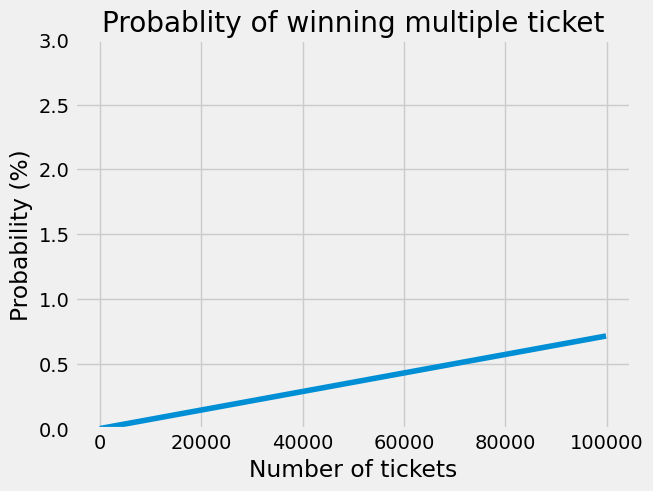

In [109]:
import matplotlib.pylab as plt

probabilities = []
tickets = range (1, 100000, 100)
for i in tickets:
    p_big_prize = multi_ticket_probability(i)
    probabilities.append(p_big_prize * 100)


plt.style.use('fivethirtyeight')
plt.plot(tickets, probabilities)
plt.title("Probablity of winning multiple ticket")
plt.xlabel("Number of tickets")
plt.ylabel("Probability (%)")
plt.ylim(0, 3)
plt.show()

Here we've plotted the chances of winning the big prize depending on the amount of tickets a player has. Note that the y limit is set to only 3% and that the x axis goes up to 100000 tickets.

Playing with multiple tickets surely increases the chances of winning but only by a very small fraction.

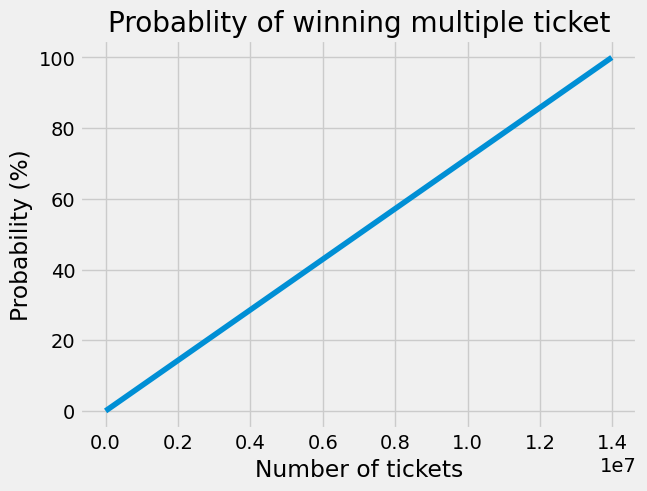

In [111]:
# how many tickets are needed for a 100% chance to win?

import matplotlib.pylab as plt

probabilities = []
tickets = range (1, 13983816, 100)
for i in tickets:
    p_big_prize = multi_ticket_probability(i)
    probabilities.append(p_big_prize * 100)


plt.style.use('fivethirtyeight')
plt.plot(tickets, probabilities)
plt.title("Probablity of winning multiple ticket")
plt.xlabel("Number of tickets")
plt.ylabel("Probability (%)")
plt.show()

## Winning the 'comfort' prizes

In most 6/49 lotteries there are smaller prizes if a player's ticket match two, three, four, or five of the six numbers drawn. Let's calculate the probability of winning theses other prizes and see if it's worthwhile to participate.

For the sake of example, let's say a player chose these six numbers on a ticket: (1, 2, 3, 4 ,5 ,6). Out of these six numbers, we can form six five-number combinations:

* (1, 2, 3, 4, 5)
* (1, 2, 3, 4, 6)
* (1, 2, 3, 5, 6)
* (1, 2, 4, 5, 6)
* (1, 3, 4, 5, 6)
* (2, 3, 4, 5, 6)

In [88]:
# let's validate that with a formula
c = combinations(6, 5)
print("There are {} five-number combinations".format(c))

There are 6.0 five-number combinations


For each one of the six five-number combinations above, there are 44 possible successful outcomes in a lottery drawing. For the combination (1, 2, 3, 4, 5), for instance, there are 44 lottery outcomes that would return a prize:

* (1, 2, 3, 4, 5, 6)
* (1, 2, 3, 4, 5, 7)
* ...
* (1, 2, 3, 4, 5, 30)
* (1, 2, 3, 4, 5, 31)
* ...
* (1, 2, 3, 4, 5, 49)

(we're going to leave out (1, 2, 3, 4, 5, 6) because we're only interested in outcomes that match exactly five numbers, not at least five numbers. This means we have 43 possible successful outcomes)

In [106]:
total_sucess_outcomes = 6 * 43
print("In total, there are {} successful outcomes".format(total_sucess_outcomes))

total_outcomes = combinations(49, 6)
print("There are {} outcomes in total".format(total_outcomes))

#P(5-winning numbers) = 258 / 49C6
p_5_winning = 258 / total_outcomes
print("The chances of winning the smaller prize when matching 5 numbers is {}%".format(format(p_5_winning*100, '.4f')))

In total, there are 258 successful outcomes
There are 13983816.0 outcomes in total
The chances of winning the smaller prize when matching 5 numbers is 0.0018%


In [104]:
# We can write a funcion that calculates this
def probability_less_6(matching_int): # matching_int: integer between 2 and 5
    successful_combinations = combinations(6, matching_int)
    n_combinations_remaining = combinations(43, 6 - matching_int)
    total_sucess_outcomes = successful_combinations * n_combinations_remaining

    #P(x-winning numbers) = successful_combinations / total_outcomes
    p_x_winning = total_sucess_outcomes / total_outcomes
    return p_x_winning

print("The chances of winning the smaller prize when matching 4 numbers is {}%".format(format(probability_less_6(4)*100, '.2f')))
print("The chances of winning the smaller prize when matching 3 numbers is {}%".format(format(probability_less_6(3)*100, '.2f')))
print("The chances of winning the smaller prize when matching 2 numbers is {}%".format(format(probability_less_6(2)*100, '.2f')))
print("The chances of winning the smaller prize when matching 1 number is {}%".format(format(probability_less_6(1)*100, '.2f')))

The chances of winning the smaller prize when matching 4 numbers is 0.10%
The chances of winning the smaller prize when matching 3 numbers is 1.77%
The chances of winning the smaller prize when matching 2 numbers is 13.24%
The chances of winning the smaller prize when matching 1 number is 41.30%
